In [33]:
import pandas as pd
import numpy as np

In [34]:
breaks = pd.read_csv("data/raw/Water_Main_Breaks.csv")
mains = pd.read_csv("data/raw/Water_Mains.csv")

In [35]:
print(breaks.shape)
breaks.sample(3)

(2766, 52)


,X,Y,OBJECTID,WATBREAKINCIDENTID,INCIDENT_DATE,BREAK_TYPE,ROAD_CLOSED,SIDEWALK_CLOSED,HOUR_IMPACTED,UNITS_IMPACTED,...,CIVIC_NUMBER,STREET,ASSETID,ASSET_DEPTH,FROST_DEPTH,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,GLOBALID
2107,-80.462241,43.450238,10092,1463,2010/02/18 00:00:00+00,MAIN,Open,Open,8-12 hours,NaN,...,49,BURBANK RD,5010,NaN,NaN,100.0,1959.0,CI,Y,c55f3b4a-ce44-431d-bd75-b52ab42b0f2a
1873,-80.492744,43.477375,9858,2266,2017/04/05 00:00:00+00,MAIN,Open,Open,8-12 hours,NaN,...,14,SPRINGDALE DR,35640,NaN,NaN,150.0,1968.0,CI,Y,8c8d2a69-8498-4135-b1cb-355b48515f59
1878,-80.451791,43.452244,9863,2271,2017/06/09 00:00:00+00,MAIN,Open,Open,8-12 hours,NaN,...,108,HICKSON DR,18650,NaN,NaN,200.0,1960.0,CI,Y,6462092d-2f78-4c70-9ea2-c0d4a22e25f0


In [36]:
print(mains.shape)
mains.sample(3)

(15865, 28)


,OBJECTID,WATMAINID,STATUS,PRESSURE_ZONE,ROADSEGMENTID,MAP_LABEL,CATEGORY,PIPE_SIZE,MATERIAL,LINED,...,CRITICALITY,REL_CLEANING_AREA,REL_CLEANING_SUBAREA,UNDERSIZED,SHALLOW_MAIN,CONDITION_SCORE,OVERSIZED,CLEANED,GlobalID,Shape__Length
2341,80421,85046,ACTIVE,KIT 4,10130,8.7m 150mm CI,TREATED,150,CI,NO,...,5,2,10,N,N,7.75,N,N,28283f1a-f17a-4f56-8879-d4980b584bb0,8.676610
2212,80280,7920,ACTIVE,KIT 4,22338,88.1m 150mm CI,TREATED,150,CI,NO,...,6,5,9,N,N,7.75,N,N,1f133e75-202f-4ce9-af8e-f22c66b198c4,88.068078
552,78398,83204,ACTIVE,KIT 4,8557,3.3m 200mm PVC,TREATED,200,PVC,NO,...,0,1,29,N,N,9.35,N,N,3d966275-dd1d-4a75-8f35-2bbdaea10d31,3.301264


In [37]:
breaks.columns

Index(['X', 'Y', 'OBJECTID', 'WATBREAKINCIDENTID', 'INCIDENT_DATE',
       'BREAK_TYPE', 'ROAD_CLOSED', 'SIDEWALK_CLOSED', 'HOUR_IMPACTED',
       'UNITS_IMPACTED', 'CW_SERVICE_REQUEST', 'STATUS', 'STATUS_DATE',
       'WORKORDER', 'RETURN_TO_NORMAL', 'BREAK_NATURE', 'BREAK_APPARENT_CAUSE',
       'REPAIR_TYPE', 'NEW_SECTION_LENGTH', 'MAINTENANCE_DESC',
       'VALVES_CLOSED', 'VALVES_OPENED', 'HYDRANTS_CALLED_OUT',
       'HYDRANTS_CALLED_BACK_IN', 'POSITIVE_PRESSURE_MAINTANED',
       'AIR_GAP_MAINTANED', 'DISINFECTED', 'MECHANICAL_REMOVAL',
       'FLUSHING_EXCAVATION', 'HIGHER_VELOCITY_FLUSHING', 'ANODE_INSTALLED',
       'BREAK_CATEGORIZATION', 'BACTERIA_TESTING_DATE',
       'HEALTH_DEPT_NOTIFICATION', 'MOECC_SAC_NOTIFICATION',
       'SAC_REFERENCE_NO', 'LOCAL_MOE_OFFICE', 'BWA_DWA', 'BWA_DWA_DECLARED',
       'PROCEEDURES_FOLLOWED', 'RECORD_CHANGE_REQD', 'ROADSEGMENTID',
       'CIVIC_NUMBER', 'STREET', 'ASSETID', 'ASSET_DEPTH', 'FROST_DEPTH',
       'ASSET_SIZE', 'ASSET_YEAR_I

In [38]:
mains.columns

Index(['OBJECTID', 'WATMAINID', 'STATUS', 'PRESSURE_ZONE', 'ROADSEGMENTID',
       'MAP_LABEL', 'CATEGORY', 'PIPE_SIZE', 'MATERIAL', 'LINED', 'LINED_DATE',
       'LINED_MATERIAL', 'INSTALLATION_DATE', 'ACQUISITION', 'CONSULTANT',
       'OWNERSHIP', 'BRIDGE_MAIN', 'BRIDGE_DETAILS', 'CRITICALITY',
       'REL_CLEANING_AREA', 'REL_CLEANING_SUBAREA', 'UNDERSIZED',
       'SHALLOW_MAIN', 'CONDITION_SCORE', 'OVERSIZED', 'CLEANED', 'GlobalID',
       'Shape__Length'],
      dtype='object')

In [39]:
merged_data = mains.merge(breaks, left_on='WATMAINID', right_on='ASSETID', how='outer')

In [40]:
merged_data['X'] = merged_data['X'].fillna(method='ffill').fillna(method='bfill')
merged_data['Y'] = merged_data['Y'].fillna(method='ffill').fillna(method='bfill')

In [41]:
merged_data.sample(4)

,OBJECTID_x,WATMAINID,STATUS_x,PRESSURE_ZONE,ROADSEGMENTID_x,MAP_LABEL,CATEGORY,PIPE_SIZE,MATERIAL,LINED,...,CIVIC_NUMBER,STREET,ASSETID,ASSET_DEPTH,FROST_DEPTH,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,GLOBALID
4957,82969.0,87628.0,ACTIVE,KIT 4,11595.0,12.2m 150mm DI,TREATED,150.0,DI,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14771,159653.0,136642.0,ACTIVE,KIT 4,11688.0,18.4m 300mm PVC,TREATED,300.0,PVC,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12685,91245.0,95452.0,ACTIVE,KIT 2W,21928.0,47.2m 300mm DI,TREATED,300.0,DI,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10144,88441.0,11660.0,ACTIVE,KIT 4,10851.0,21.6m 300mm CI,TREATED,300.0,CI,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17429 entries, 0 to 17428
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OBJECTID_x                   17009 non-null  float64
 1   WATMAINID                    17009 non-null  float64
 2   STATUS_x                     17009 non-null  object 
 3   PRESSURE_ZONE                17009 non-null  object 
 4   ROADSEGMENTID_x              17009 non-null  float64
 5   MAP_LABEL                    17009 non-null  object 
 6   CATEGORY                     17009 non-null  object 
 7   PIPE_SIZE                    17009 non-null  float64
 8   MATERIAL                     17009 non-null  object 
 9   LINED                        17009 non-null  object 
 10  LINED_DATE                   86 non-null     object 
 11  LINED_MATERIAL               17009 non-null  object 
 12  INSTALLATION_DATE            16869 non-null  object 
 13  ACQUISITION     

In [43]:
merged_data.columns

Index(['OBJECTID_x', 'WATMAINID', 'STATUS_x', 'PRESSURE_ZONE',
       'ROADSEGMENTID_x', 'MAP_LABEL', 'CATEGORY', 'PIPE_SIZE', 'MATERIAL',
       'LINED', 'LINED_DATE', 'LINED_MATERIAL', 'INSTALLATION_DATE',
       'ACQUISITION', 'CONSULTANT', 'OWNERSHIP', 'BRIDGE_MAIN',
       'BRIDGE_DETAILS', 'CRITICALITY', 'REL_CLEANING_AREA',
       'REL_CLEANING_SUBAREA', 'UNDERSIZED', 'SHALLOW_MAIN', 'CONDITION_SCORE',
       'OVERSIZED', 'CLEANED', 'GlobalID', 'Shape__Length', 'X', 'Y',
       'OBJECTID_y', 'WATBREAKINCIDENTID', 'INCIDENT_DATE', 'BREAK_TYPE',
       'ROAD_CLOSED', 'SIDEWALK_CLOSED', 'HOUR_IMPACTED', 'UNITS_IMPACTED',
       'CW_SERVICE_REQUEST', 'STATUS_y', 'STATUS_DATE', 'WORKORDER',
       'RETURN_TO_NORMAL', 'BREAK_NATURE', 'BREAK_APPARENT_CAUSE',
       'REPAIR_TYPE', 'NEW_SECTION_LENGTH', 'MAINTENANCE_DESC',
       'VALVES_CLOSED', 'VALVES_OPENED', 'HYDRANTS_CALLED_OUT',
       'HYDRANTS_CALLED_BACK_IN', 'POSITIVE_PRESSURE_MAINTANED',
       'AIR_GAP_MAINTANED', 'DISINFECT

In [44]:
# show info for X and Y columns
merged_data[['X', 'Y']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17429 entries, 0 to 17428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       17429 non-null  float64
 1   Y       17429 non-null  float64
dtypes: float64(2)
memory usage: 408.5 KB


In [45]:
merged_data.shape

(17429, 80)

In [47]:
# move the X and Y columns to the front of the dataframe
column_order = merged_data.columns.tolist()
column_order.insert(0, column_order.pop(column_order.index('X')))
column_order.insert(1, column_order.pop(column_order.index('Y')))
merged_data = merged_data.reindex(columns=column_order)

In [48]:
merged_data.sample(4)

,X,Y,OBJECTID_x,WATMAINID,STATUS_x,PRESSURE_ZONE,ROADSEGMENTID_x,MAP_LABEL,CATEGORY,PIPE_SIZE,...,CIVIC_NUMBER,STREET,ASSETID,ASSET_DEPTH,FROST_DEPTH,ASSET_SIZE,ASSET_YEAR_INSTALLED,ASSET_MATERIAL,ASSET_EXISTS,GLOBALID
16302,-80.419466,43.425124,200855.0,143930.0,ACTIVE,KIT 4,102798.0,4m 300mm PVC,TREATED,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10514,-80.463791,43.461300,88836.0,54590.0,ACTIVE,KIT 6,40251.0,109.4m 200mm PVC,TREATED,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350,-80.499035,43.415287,90882.0,95158.0,ACTIVE,KIT 4,10174.0,4m 150mm PVC,TREATED,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6842,-80.521297,43.427710,85063.0,18640.0,ACTIVE,KIT 6,20851.0,218.5m 150mm DI,TREATED,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
grouped_data = merged_data.groupby('WATMAINID')

In [50]:
filled_data = grouped_data.apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))

/var/folders/xs/d1td623j4l5_3s9p262jr4yw0000gn/T/ipykernel_5227/3790841845.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  filled_data = grouped_data.apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))


In [51]:
filled_data.reset_index(drop=True, inplace=True)

In [52]:
missing_values_before = merged_data.isnull().sum()
missing_values_after = filled_data.isnull().sum()

print("Missing values before filling:")
print(missing_values_before)
print("\nMissing values after filling:")
print(missing_values_after)

Missing values before filling:
X                           0
Y                           0
OBJECTID_x                420
WATMAINID                 420
STATUS_x                  420
                        ...  
ASSET_SIZE              14836
ASSET_YEAR_INSTALLED    14840
ASSET_MATERIAL          14836
ASSET_EXISTS            14663
GLOBALID                14663
Length: 80, dtype: int64

Missing values after filling:
X                           0
Y                           0
OBJECTID_x                  0
WATMAINID                   0
STATUS_x                    0
                        ...  
ASSET_SIZE              14665
ASSET_YEAR_INSTALLED    14666
ASSET_MATERIAL          14665
ASSET_EXISTS            14663
GLOBALID                14663
Length: 80, dtype: int64


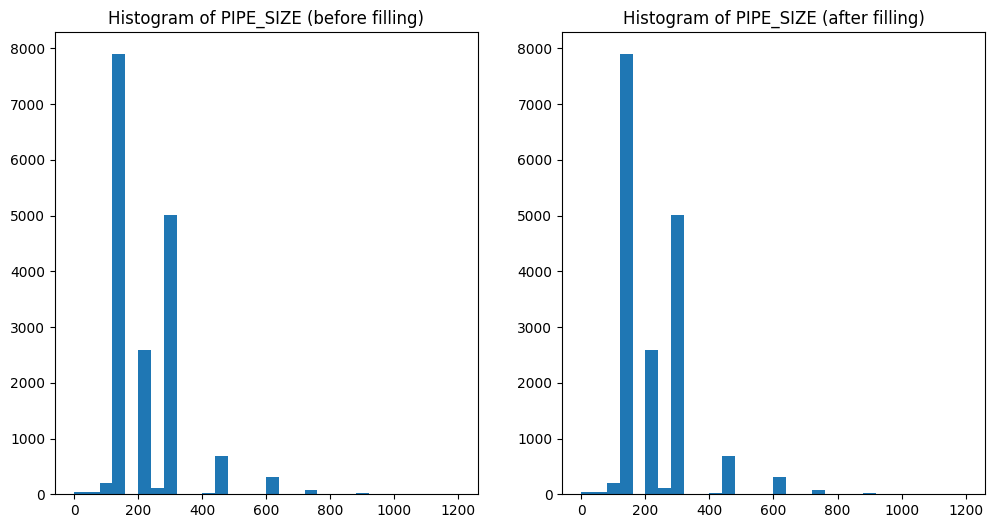

Descriptive statistics (before filling):
count    17009.000000
mean       226.048798
std        107.753684
min          0.000000
25%        150.000000
50%        200.000000
75%        300.000000
max       1200.000000
Name: PIPE_SIZE, dtype: float64

Descriptive statistics (after filling):
count    17009.000000
mean       226.048798
std        107.753684
min          0.000000
25%        150.000000
50%        200.000000
75%        300.000000
max       1200.000000
Name: PIPE_SIZE, dtype: float64


In [53]:
import matplotlib.pyplot as plt

# Choose a numeric column for comparison
column_name = 'PIPE_SIZE'

# Plot histograms before and after filling
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(merged_data[column_name].dropna(), bins=30)
plt.title(f'Histogram of {column_name} (before filling)')

plt.subplot(122)
plt.hist(filled_data[column_name].dropna(), bins=30)
plt.title(f'Histogram of {column_name} (after filling)')

plt.show()

# Compare descriptive statistics
print("Descriptive statistics (before filling):")
print(merged_data[column_name].describe())
print("\nDescriptive statistics (after filling):")
print(filled_data[column_name].describe())

In [69]:
breaks = pd.read_csv("data/raw/Water_Main_Breaks.csv", usecols=['X', 'Y', 'INCIDENT_DATE', 'BREAK_TYPE', 'BREAK_NATURE', 'BREAK_APPARENT_CAUSE', 
                                                                'BREAK_CATEGORIZATION', 'STREET', 'ASSETID', 'ASSET_EXISTS'])

['OBJECTID', 'WATMAINID', 'STATUS', 'PRESSURE_ZONE', 'ROADSEGMENTID',
       'MAP_LABEL', 'CATEGORY', 'PIPE_SIZE', 'MATERIAL', 'LINED', 'LINED_DATE',
       'LINED_MATERIAL', 'INSTALLATION_DATE', 'ACQUISITION', 'CONSULTANT',
       'OWNERSHIP', 'BRIDGE_MAIN', 'BRIDGE_DETAILS', 'CRITICALITY',
       'REL_CLEANING_AREA', 'REL_CLEANING_SUBAREA', 'UNDERSIZED',
       'SHALLOW_MAIN', 'CONDITION_SCORE', 'OVERSIZED', 'CLEANED', 'GlobalID',
       'Shape__Length']

In [70]:
mains = pd.read_csv("data/raw/Water_Mains.csv", usecols=['OBJECTID', 'WATMAINID', 'PRESSURE_ZONE', 'ROADSEGMENTID',
                                                         'PIPE_SIZE', 'MATERIAL', 'INSTALLATION_DATE', 'CRITICALITY',
                                                         'CONDITION_SCORE'])

In [71]:
# merge the two dataframes on the ASSETID column (which is the same as WATMAINID) and only keep the rows that have a match
merged_df = mains.merge(breaks, left_on='WATMAINID', right_on='ASSETID', how='inner')

In [72]:
print(merged_df.shape)
merged_df.sample(3)

(2346, 19)


,OBJECTID,WATMAINID,PRESSURE_ZONE,ROADSEGMENTID,PIPE_SIZE,MATERIAL,INSTALLATION_DATE,CRITICALITY,CONDITION_SCORE,X,Y,INCIDENT_DATE,BREAK_TYPE,BREAK_NATURE,BREAK_APPARENT_CAUSE,BREAK_CATEGORIZATION,STREET,ASSETID,ASSET_EXISTS
2050,91415,29210,KIT 4,9217,300,CI,1950/01/01 00:00:00+00,7,5.70,-80.468501,43.443549,2019/05/07 00:00:00+00,MAIN,UNKNOWN,COMBINATION,CATEGORY 1,OTTAWA ST N,29210,Y
559,81466,86120,KIT 4,11438,300,CI,1967/01/01 00:00:00+00,7,6.25,-80.470174,43.430713,2015/12/23 00:00:00+00,MAIN,UNKNOWN,OTHER,CATEGORY 1,COURTLAND AVE E,86120,Y
53,78107,18310,KIT 5,8727,300,DI,1969/01/01 00:00:00+00,7,4.90,-80.525332,43.439419,2003/02/18 00:00:00+00,MAIN,UNKNOWN,OTHER,CATEGORY 1,HAZELGLEN DR,18310,Y


- move X and Y to front of frame
    - call them latitude and longitude
- lowercase the col names
- drop ID columns
- convert dates to datetime
- keep only assets that exist and then drop the column

In [73]:
column_order = merged_df.columns.tolist()
column_order.insert(0, column_order.pop(column_order.index('X')))
column_order.insert(1, column_order.pop(column_order.index('Y')))
merged_df = merged_df.reindex(columns=column_order)

In [74]:
merged_df.rename(columns={'X': 'latitude', 'Y': 'longitude'}, inplace=True)
merged_df.columns = merged_df.columns.str.lower()

In [75]:
# drop ID columns
merged_df.drop(columns=['objectid', 'watmainid', 'assetid', 'roadsegmentid'], inplace=True)

# converting date columns to pd.to_datetime
merged_df['installation_date'] = pd.to_datetime(merged_df['installation_date'])
merged_df['incident_date'] = pd.to_datetime(merged_df['incident_date'])

# keep only assets that exist
merged_df = merged_df[merged_df['asset_exists'] == 'Y']

In [77]:
print(merged_df.shape)
merged_df.sample(3)

(1978, 15)


,latitude,longitude,pressure_zone,pipe_size,material,installation_date,criticality,condition_score,incident_date,break_type,break_nature,break_apparent_cause,break_categorization,street,asset_exists
1415,-80.529807,43.449459,KIT 4,150,CI,1966-01-01 00:00:00+00:00,5,5.45,2007-01-17 00:00:00+00:00,MAIN,CIRCUMFERENTIAL,OTHER,CATEGORY 1,INVERNESS DR,Y
765,-80.474047,43.442552,KIT 4,150,CI,1925-01-01 00:00:00+00:00,7,3.83,2010-10-18 00:00:00+00:00,MAIN,CORROSION AND FITTING/JOINT,COMBINATION,CATEGORY 1,BORDEN AVE S,Y
1469,-80.470096,43.457427,KIT 4,150,CI,1974-07-17 00:00:00+00:00,6,5.35,2003-01-25 00:00:00+00:00,MAIN,UNKNOWN,OTHER,CATEGORY 1,BECKER ST,Y


In [78]:
merged_df.drop(columns=['asset_exists'], inplace=True)

In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2344
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   latitude              1978 non-null   float64            
 1   longitude             1978 non-null   float64            
 2   pressure_zone         1978 non-null   object             
 3   pipe_size             1978 non-null   int64              
 4   material              1978 non-null   object             
 5   installation_date     1965 non-null   datetime64[ns, UTC]
 6   criticality           1978 non-null   int64              
 7   condition_score       1978 non-null   float64            
 8   incident_date         1978 non-null   datetime64[ns, UTC]
 9   break_type            1978 non-null   object             
 10  break_nature          1873 non-null   object             
 11  break_apparent_cause  1821 non-null   object             
 12  break_

In [80]:
# drop rows with missing installation date
merged_df.dropna(subset=['installation_date'], inplace=True)

In [81]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 2344
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   latitude              1965 non-null   float64            
 1   longitude             1965 non-null   float64            
 2   pressure_zone         1965 non-null   object             
 3   pipe_size             1965 non-null   int64              
 4   material              1965 non-null   object             
 5   installation_date     1965 non-null   datetime64[ns, UTC]
 6   criticality           1965 non-null   int64              
 7   condition_score       1965 non-null   float64            
 8   incident_date         1965 non-null   datetime64[ns, UTC]
 9   break_type            1965 non-null   object             
 10  break_nature          1861 non-null   object             
 11  break_apparent_cause  1809 non-null   object             
 12  break_